In [1]:
data = """LLR

AAA = (BBB, BBB)
BBB = (AAA, ZZZ)
ZZZ = (ZZZ, ZZZ)"""

In [2]:
data = """RL

AAA = (BBB, CCC)
BBB = (DDD, EEE)
CCC = (ZZZ, GGG)
DDD = (DDD, DDD)
EEE = (EEE, EEE)
GGG = (GGG, GGG)
ZZZ = (ZZZ, ZZZ)"""

In [3]:
with open(f'08.txt', 'r') as file:
    data = file.read().strip()

In [4]:
instructions, nodes = data.split('\n\n')

instructions = [int(instruction == 'R') for instruction in instructions]
    
nodes = nodes.split('\n')
nodes = [node.split(' = ') for node in nodes]
nodes = {key : value[1:-1].split(', ') for key, value in nodes}

initial_node, final_node = list(nodes.keys())[::len(nodes)-1]

In [5]:
# steps = 0
# current_node = initial_node
# record = []
# while current_node != final_node and steps < 1000:
#     instruction = instructions[steps % len(instructions)]
#     record.append([steps, instruction, current_node])
#     current_node = nodes[current_node][instruction]
#     steps += 1
# record.append([steps, instruction, current_node])
# 
# # puzzle 1
# print(steps)

In [6]:
# let's try another approach

class Node:
    
    def __init__(self, name, left=None, right=None):
        self.name = name
        self.left = left
        self.right = right
    
    def __repr__(self):
        return f"{self.name} -> {self.left}, {self.right}"
    
    def set_left(self, left):
        self.left = left
    
    def set_right(self, right):
        self.right = right

    def get_next(self, side):
        if side:
            return self.right
        else:
            return self.left

In [7]:
obj_nodes = {key : [Node(key), value] for key, value in nodes.items()}

for key, (obj_node, values) in obj_nodes.items():
    left, right = values
    obj_node.set_right(obj_nodes.get(right)[0])
    obj_node.set_left(obj_nodes.get(left)[0])

#obj_nodes = list(obj_nodes.keys())
#
obj_nodes

RecursionError: maximum recursion depth exceeded

In [ ]:
initial_node, final_node = obj_nodes[::len(obj_nodes)-1]
print(type(initial_node))
steps = 0
current_node = initial_node
while current_node != final_node and steps < 1000:
    instruction = instructions[steps % len(instructions)]
    current_node = current_node.get_next(instruction)
    print(type(current_node))
    steps += 1

# puzzle 1
print(steps)

KeyError: slice(None, None, 745)

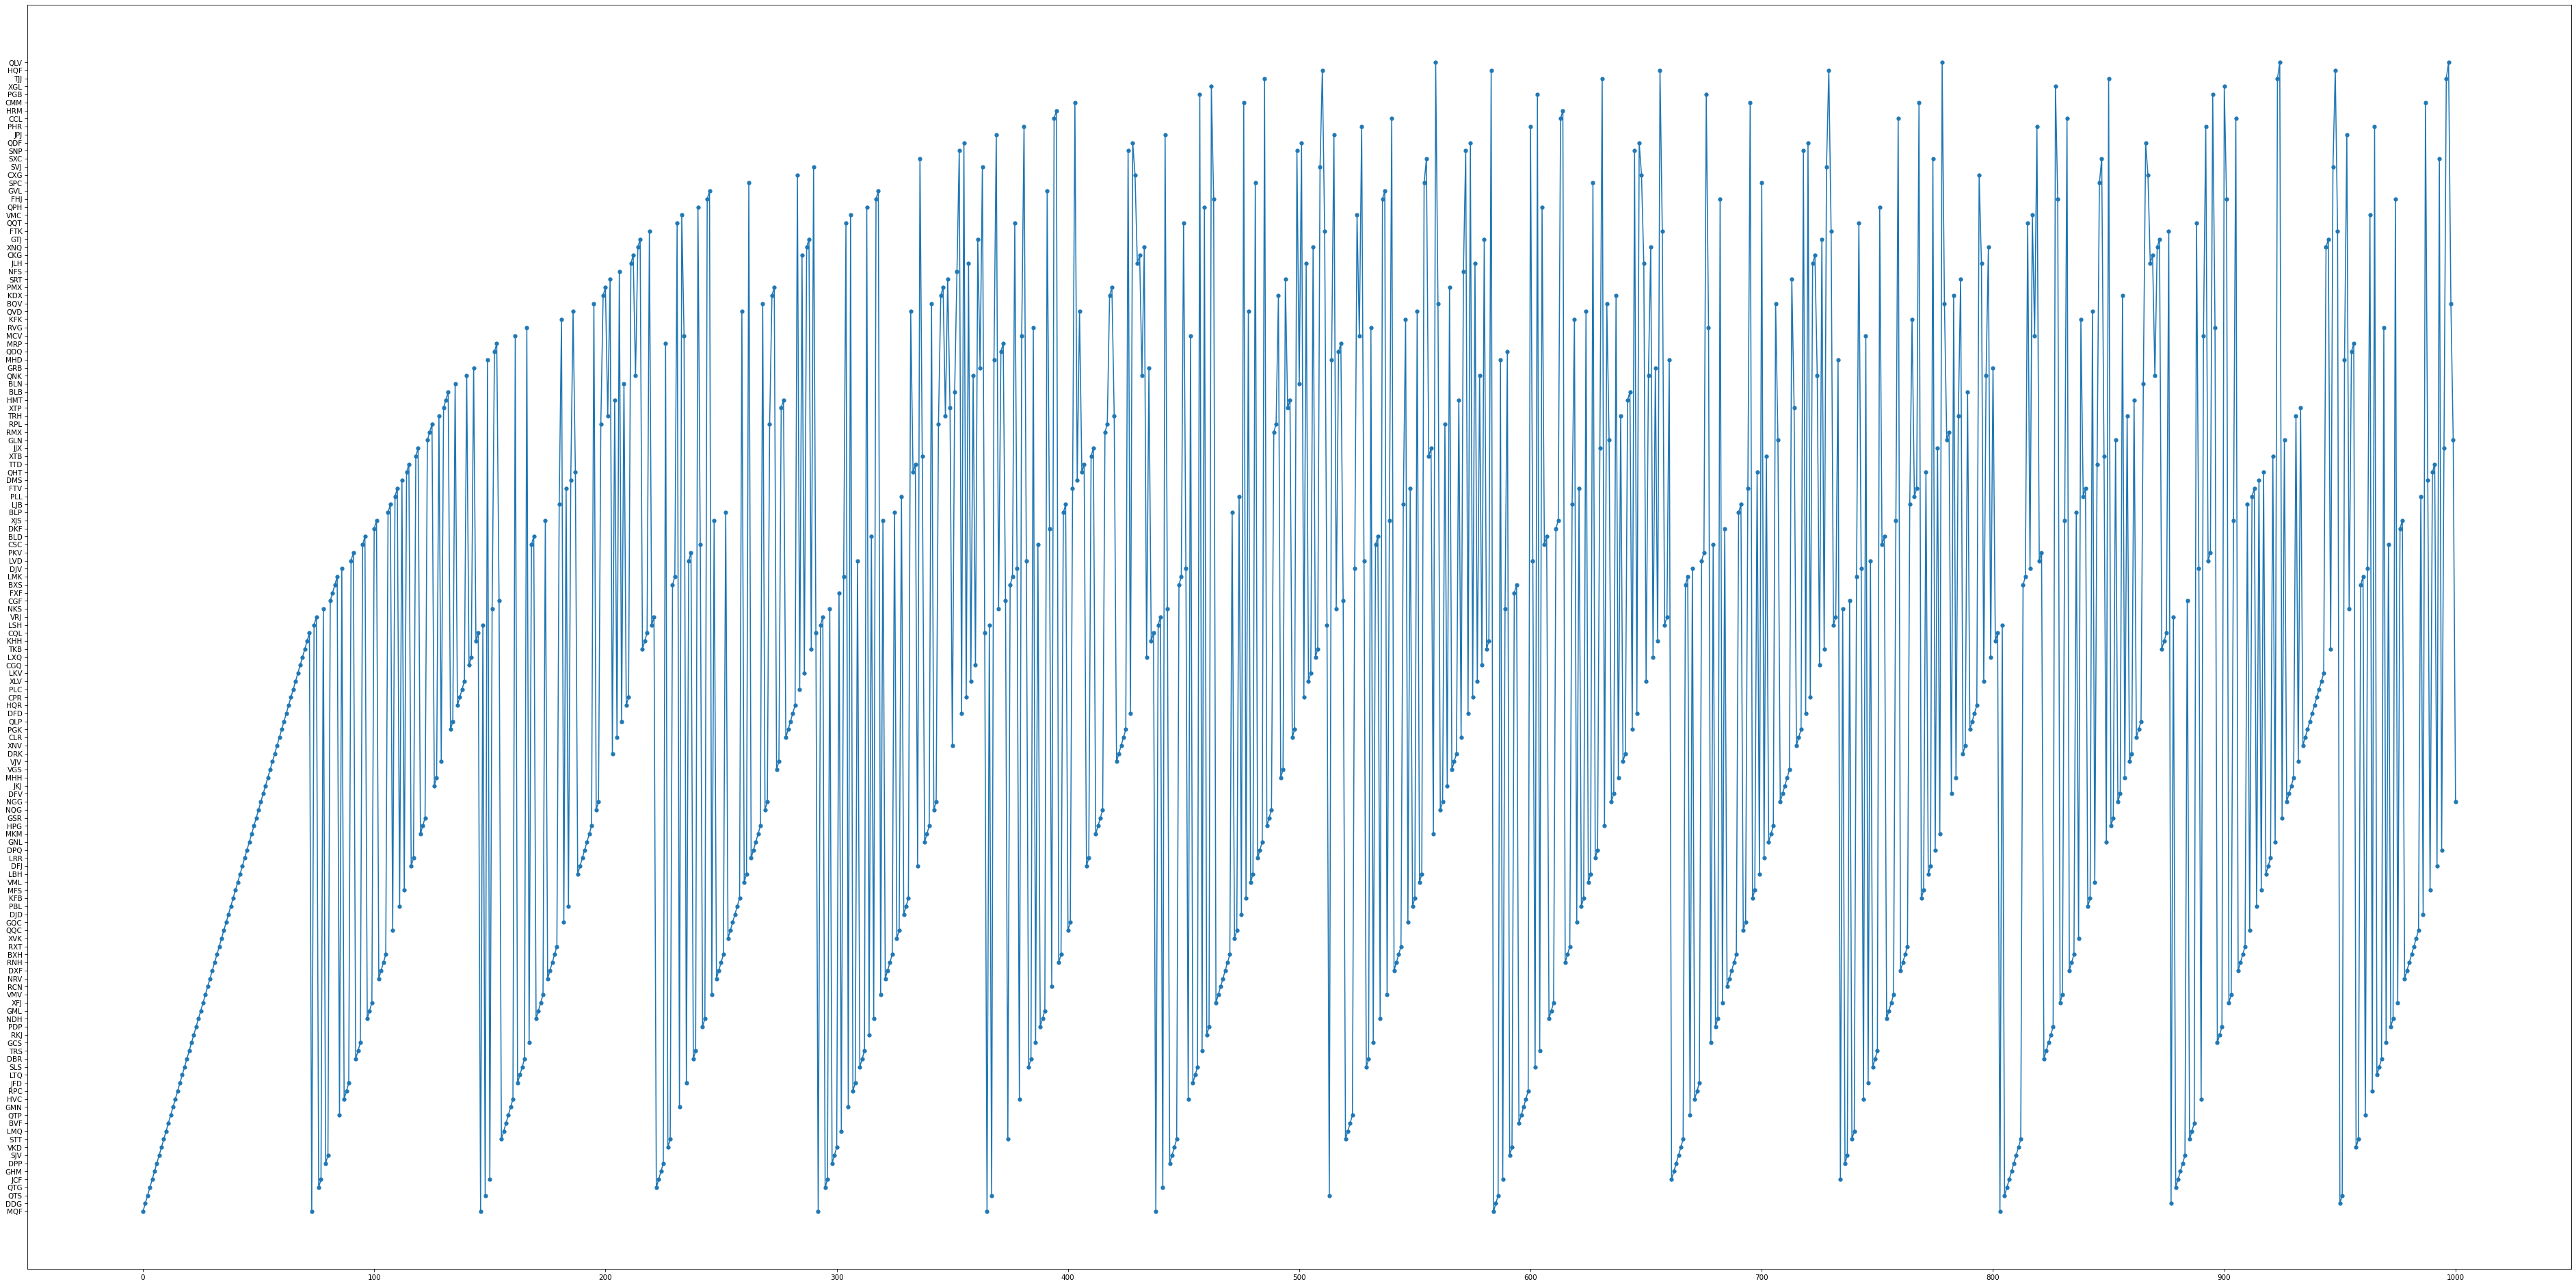

In [ ]:
0=1
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(64,32), dpi=75)

s, i, n = list(zip(*record))

ax.plot(s, n, marker='.', markersize=10)

ax.set_xticks(range(0, len(s), 100))
#ax.set_yticks(list(nodes.keys()))

plt.show()